# 所需所有模块

In [3]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics
import xgboost as xgb
from sklearn.datasets import load_iris

In [4]:
iris=load_iris()
data_raw_df = pd.concat([pd.DataFrame(iris.data), pd.DataFrame(iris.target)], axis=1)
data_raw_df.columns = ["x1","x2", "x3","x4", "y"]
data_df = data_raw_df[data_raw_df["y"]<2]

X = data_df.values[:, :-1]
y = data_df.values[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=76)
X_train_xgb, X_train_lr, y_train_xgb, y_train_lr = train_test_split(X_train, y_train, test_size=0.75, random_state=76)

In [5]:
y_train_lr

array([0., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 1., 0., 1., 0., 1., 1.,
       0., 1., 0., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0.,
       1., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0.,
       1., 0.])

In [6]:
import xgboost as xgb
xgb = xgb.XGBClassifier(
        objective="binary:logistic",
        eval_metric = 'logloss',
        booster = 'gbtree',               # gbtree, gblinear or dart
        learning_rate = 0.01,             # 如同学习率
        n_estimators = 6,                 # 树的个数
        max_depth = 5,                    # 构建树的深度，越大越容易过拟合
        min_child_weight = 3,             # 这个参数默认是 1，是每个叶子里面 h 的和至少是多少
        gamma = 0.3,                      # 树的叶子节点上作进一步分区所需的最小损失减少,越大越保守，一般0.1、0.2这样子。
        # subsample = 0.5,                # 随机采样训练样本 训练实例的子采样比
        # colsample_bytree = 0.8,         # 生成树时进行的列采样 
        # reg_alpha = 1,                  # L1 正则项参数
        # reg_lambda = 4,                 # 控制模型复杂度的权重值的L2正则化项参数，参数越大，模型越不容易过拟合。
        # max_delta_step = 0,             # 最大增量步长，我们允许每个树的权重估计。
        # seed = 100,                     # 随机种子
        missing = -999.0                  # 为缺失值设置默认值
)

In [7]:
xgb.get_xgb_params()

{'objective': 'binary:logistic',
 'base_score': None,
 'booster': 'gbtree',
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'eval_metric': 'logloss',
 'gamma': 0.3,
 'gpu_id': None,
 'grow_policy': None,
 'interaction_constraints': None,
 'learning_rate': 0.01,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': 5,
 'max_leaves': None,
 'min_child_weight': 3,
 'monotone_constraints': None,
 'n_jobs': None,
 'num_parallel_tree': None,
 'predictor': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [8]:
%%time
xgb_model = xgb.fit(X_train_xgb, y_train_xgb, verbose=True)
xgb_model.predict_proba(X_test)

CPU times: user 40.1 ms, sys: 0 ns, total: 40.1 ms
Wall time: 139 ms


array([[0.4986, 0.5014],
       [0.4986, 0.5014],
       [0.4986, 0.5014],
       [0.4986, 0.5014],
       [0.4986, 0.5014],
       [0.4986, 0.5014],
       [0.4986, 0.5014],
       [0.4986, 0.5014],
       [0.4986, 0.5014],
       [0.4986, 0.5014],
       [0.4986, 0.5014],
       [0.4986, 0.5014],
       [0.4986, 0.5014],
       [0.4986, 0.5014],
       [0.4986, 0.5014],
       [0.4986, 0.5014],
       [0.4986, 0.5014],
       [0.4986, 0.5014],
       [0.4986, 0.5014],
       [0.4986, 0.5014],
       [0.4986, 0.5014],
       [0.4986, 0.5014],
       [0.4986, 0.5014],
       [0.4986, 0.5014],
       [0.4986, 0.5014],
       [0.4986, 0.5014],
       [0.4986, 0.5014],
       [0.4986, 0.5014],
       [0.4986, 0.5014],
       [0.4986, 0.5014]], dtype=float32)

In [9]:
xgb_model.apply(X_train_xgb, ntree_limit=0).shape

(17, 6)

In [10]:
ohe = OneHotEncoder()
ohe.fit(xgb.apply(X_train_xgb, ntree_limit=0))
lr_model = LogisticRegression(
    class_weight= "balanced",
    penalty='l2',
    dual=False, 
    tol=0.001,
    C=0.001, 
    # fit_intercept=True, 
    # intercept_scaling=1, 
    # random_state=None, 
    # solver='liblinear',   # newton-cg, lbfgs, liblinear, sag, saga}, default: liblinear.
    # max_iter=100, 
    # multi_class='ovr',  # ovr, multinomial, auto
    # verbose=0, 
    # warm_start=False, 
    # n_jobs=None
).fit(ohe.transform(xgb.apply(X_train_lr)), y_train_lr.astype('uint8'))

In [11]:
#y_predict = lr_model.predict_proba(ohe.transform(xgb.apply(X_test)))
y_predict = lr_model.predict(ohe.transform(xgb.apply(X_test)))

In [1]:
import matplotlib.pyplot as plot
from xgboost import plot_tree

plot_tree(xgb, num_trees=1)
# 设置图形的大小
plot.rcParams['figure.figsize'] = [50, 20]
plot.show()

NameError: name 'xgb' is not defined

In [13]:
from xgboost import plot_importance
plot_importance(xgb)
plt.rcParams['figure.figsize'] = [10, 10]
plt.show()

ValueError: Booster.get_score() results in empty.  This maybe caused by having all trees as decision dumps.

In [56]:
from sklearn.metrics import classification_report
#metrics.accuracy_score(y_test, y_predict)
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

         0.0       0.53      1.00      0.70        16
         1.0       0.00      0.00      0.00        14

    accuracy                           0.53        30
   macro avg       0.27      0.50      0.35        30
weighted avg       0.28      0.53      0.37        30



/data/home/its/VirtualReality/conda/miniforge/envs/bion/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/data/home/its/VirtualReality/conda/miniforge/envs/bion/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/data/home/its/VirtualReality/conda/miniforge/envs/bion/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

In [57]:
metrics.roc_auc_score(y_test, y_predict)

0.5

# 混淆矩阵

In [58]:
import matplotlib.pyplot as plot
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred=y_predict, labels=[1,0])
display = ConfusionMatrixDisplay(cm)

plot.show()


# 模型效果评估

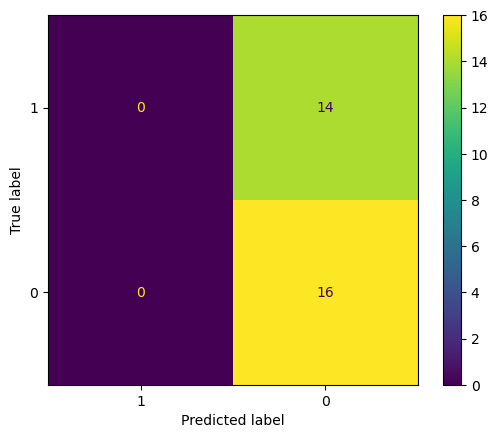

In [60]:
import matplotlib.pyplot as plot
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred=y_predict, labels=[1,0])
display = ConfusionMatrixDisplay(confusion_matrix=cm,  display_labels=[1,0])
display.plot(
    include_values=True
)

# plot.show()




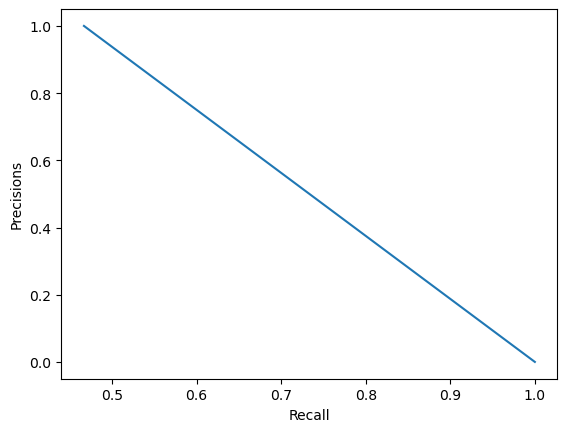

In [41]:
import matplotlib.pyplot as plot
from sklearn.metrics import precision_recall_curve, average_precision_score

precisions, recalls, thresholds = precision_recall_curve(y_test, y_predict)
plot.xlabel('Recall')
plot.ylabel('Precisions')
plot.plot(precision, recalls)
# plot.show()


# 特征相关